https://www.investing.com/commodities/us-corn-historical-data

In [1]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

In [48]:
dataset= pd.read_csv("US Corn Futures Historical Data.csv")

In [49]:
dataset.head(2)

,Date,Price,Open,High,Low,Vol.,Change %
0,1-Oct-08,484.0,494.0,500.0,482.75,141.93K,-0.72%
1,2-Oct-08,454.0,485.0,488.0,454.00,150.59K,-6.20%


In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2986 entries, 0 to 2985
Data columns (total 7 columns):
Date        2986 non-null object
Price       2986 non-null float64
Open        2986 non-null float64
High        2986 non-null float64
Low         2986 non-null float64
Vol.        2986 non-null object
Change %    2986 non-null object
dtypes: float64(4), object(3)
memory usage: 163.4+ KB


In [54]:
#dataset['Vol.'] = pd.to_numeric(dataset['Vol.'], errors='coerce')

In [55]:
dataset["Average"] = np.average([dataset['High'], dataset['Low']], axis=0)

In [56]:
dataset.head(2)

,Date,Price,Open,High,Low,Vol.,Change %,Average
0,1-Oct-08,484.0,494.0,500.0,482.75,NaN,-0.72%,491.375
1,2-Oct-08,454.0,485.0,488.0,454.00,NaN,-6.20%,471.000


In [8]:
dataset_for_prediction= pd.DataFrame()

In [9]:
dataset_for_prediction['ds'] = pd.to_datetime(dataset["Date"])

In [10]:
dataset_for_prediction["y"] = dataset["Average"]

In [11]:
dataset_for_prediction.head(2)

,ds,y
0,2008-10-01,491.375
1,2008-10-02,471.000


In [12]:
pro1 = Prophet()

In [13]:
pro1.fit(dataset_for_prediction)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [14]:
future= pro1.make_future_dataframe(periods=300)

In [15]:
future.tail(2)

,ds
3284,2020-09-07
3285,2020-09-08


In [16]:
forecast=pro1.predict(future)

In [17]:
dataset['yhat'] = forecast['yhat']

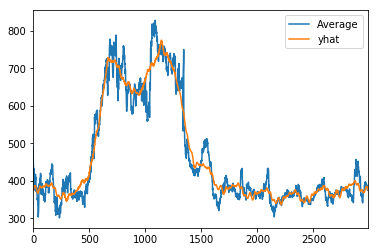

In [18]:
dataset['Average'].plot(legend=True)
dataset['yhat'].plot(legend= True)


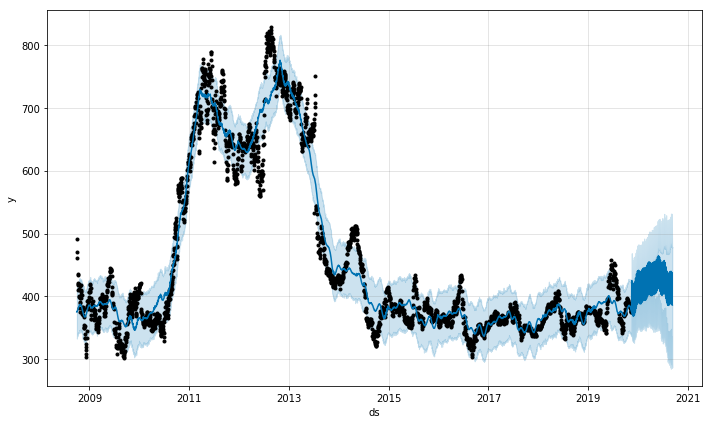

In [19]:
fig1 =pro1.plot(forecast)


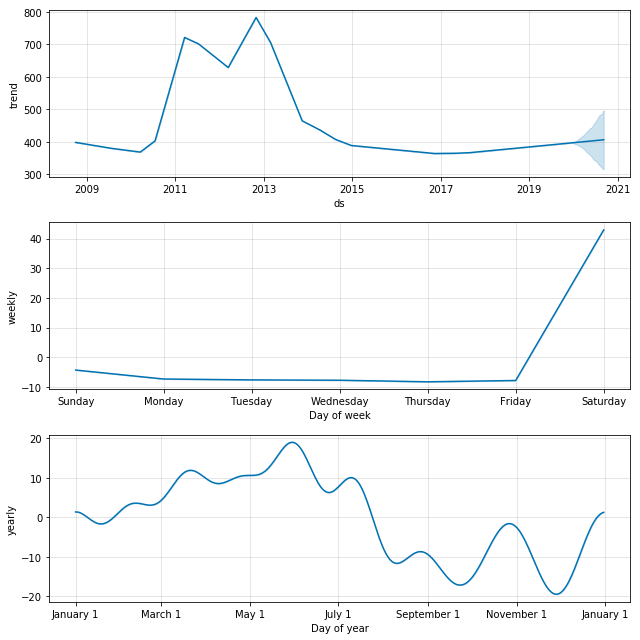

In [20]:
# to view  the forecast components
fig1 = pro1.plot_components(forecast)

__By default, Prophet adds 25 changepoints into the initial 80% of the data-set. The number of changepoints can be set by using the n_changepoints parameter when initializing prophet (e.g., model=Prophet(n_changepoints=30)__

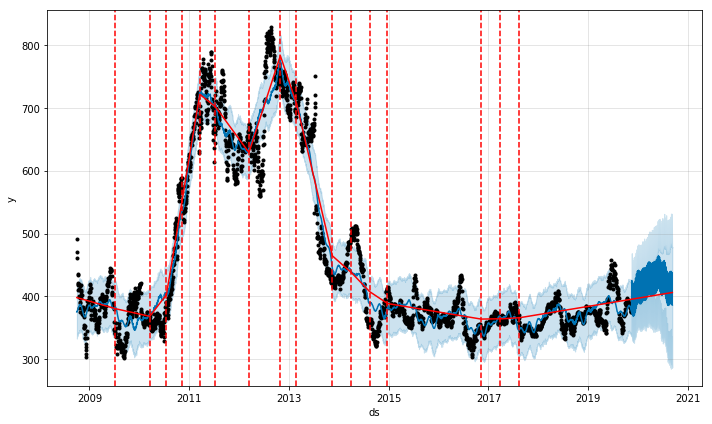

In [21]:
#Change points
#Prophet detects changepoints by first specifying a large number of potential changepoints at which the rate is allowed to change
from fbprophet.plot import add_changepoints_to_plot
fig = pro1.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), pro1, forecast)

In [22]:
pro1.changepoints

95     2009-02-18
191    2009-07-07
286    2009-11-12
382    2010-03-19
477    2010-07-19
573    2010-11-09
668    2011-03-20
764    2011-07-12
859    2011-11-01
955    2012-03-14
1050   2012-07-08
1146   2012-10-30
1241   2013-02-25
1337   2013-07-04
1432   2013-11-15
1528   2014-04-03
1623   2014-08-14
1719   2014-12-23
1814   2015-05-08
1910   2015-09-23
2005   2016-02-04
2101   2016-06-22
2196   2016-11-04
2292   2017-03-27
2387   2017-08-10
Name: ds, dtype: datetime64[ns]

__Prophet will also let us take a look at the magnitudes of these possible changepoints__

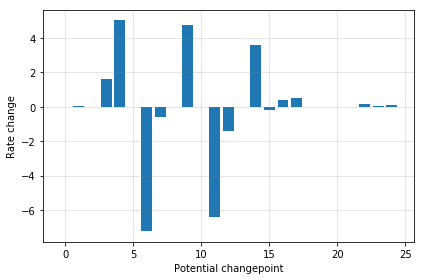

In [23]:
deltas = pro1.params['delta'].mean(0)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



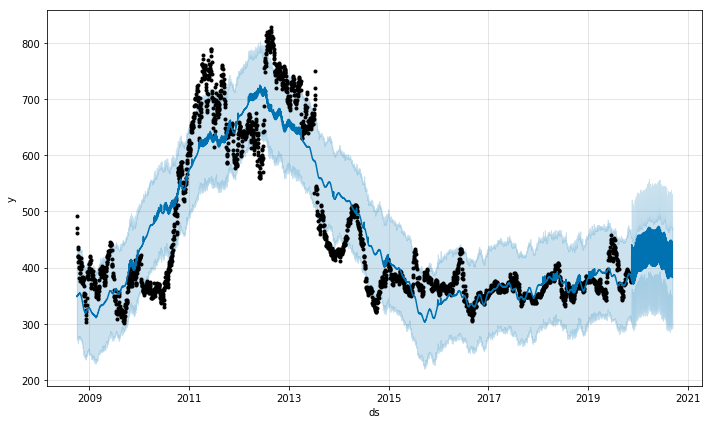

In [24]:
pro1 = Prophet(changepoints=['2009-02-18', '2011-03-20', '2012-07-08', '2013-02-25',
               '2015-09-23', '2016-06-22'])
forecast = pro1.fit(dataset_for_prediction).predict(future)
pro1.plot(forecast);


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



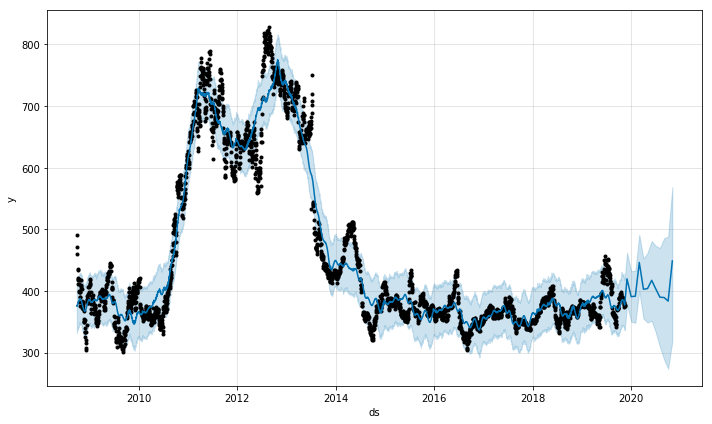

In [30]:
#create 12 months of future data
pro1= Prophet()
pro1.fit(dataset_for_prediction)
future_data = pro1.make_future_dataframe(periods=12, freq = 'm')
 
#forecast the data for future data
forecast_data = pro1.predict(future_data)
pro1.plot(forecast_data);

If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible:

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



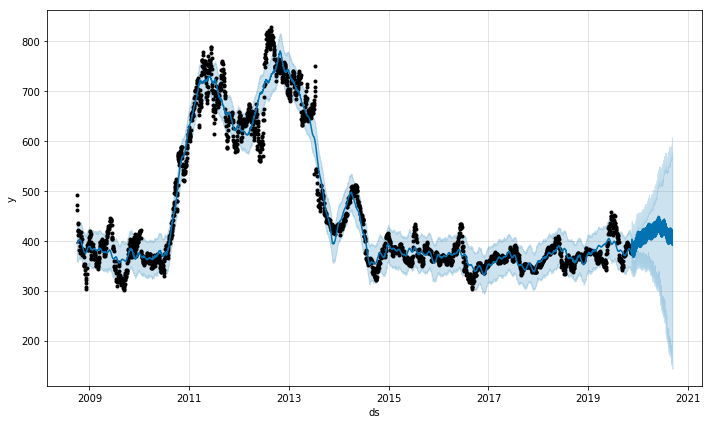

In [61]:
pro_trend = Prophet(changepoint_prior_scale=0.5)
forecast = pro_trend.fit(dataset_for_prediction).predict(future)
fig = pro_trend.plot(forecast)

In [36]:
peak_season = pd.DataFrame({
  'holiday': 'Peak season',
  'ds': pd.to_datetime(['2009-05-01', '2009-09-30', '2010-05-01', '2010-09-30', '2011-05-01', '2011-09-30',
                      '2012-05-01', '2012-09-30','2013-05-01', '2013-09-30','2014-05-01', '2014-09-30',
                      '2015-05-01', '2015-09-30','2016-05-01', '2016-09-30','2017-05-01', '2017-09-30',
                       '2018-05-01', '2018-09-30','2019-05-01', '2019-09-30',]),
  'lower_window': 0,
  'upper_window': 0,
})

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



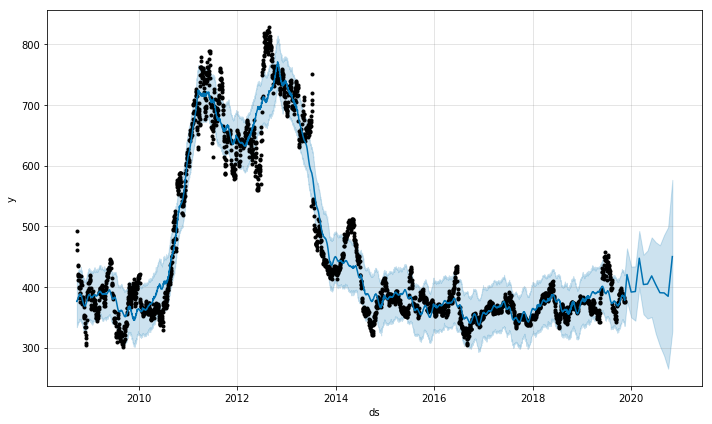

In [37]:
pro2= Prophet(holidays=peak_season)
pro2.fit(dataset_for_prediction)
future_data = pro2.make_future_dataframe(periods=12, freq = 'm')
 
#forecast the data for future data
forecast_data = pro2.predict(future_data)
pro2.plot(forecast_data);

In [58]:
dataset_for_prediction['High']= dataset['High']
dataset_for_prediction['Low']= dataset['Low']
dataset_for_prediction['Price']= dataset['Price']

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\khandelwalr\AppData\Local\Continuum\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



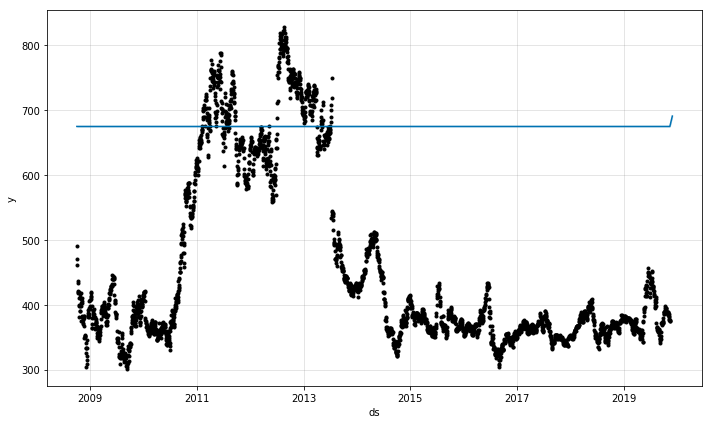

In [63]:
pro_regressor= Prophet()
pro_regressor.add_regressor('High')
pro_regressor.add_regressor('Low')
pro_regressor.add_regressor('Price')
pro_regressor.fit(dataset_for_prediction)
future_data = pro_regressor.make_future_dataframe(periods=1, freq = 'm')

future_data['High'] =700
future_data["Low"]=650
future_data['Price'] = 688
#forecast the data for future data
forecast_data = pro_regressor.predict(future_data)
pro_regressor.plot(forecast_data);

In [62]:
future_data

,ds,High,Low,Price
0,2008-10-01,700,650,688
1,2008-10-02,700,650,688
2,2008-10-03,700,650,688
3,2008-10-06,700,650,688
4,2008-10-07,700,650,688
5,2008-10-08,700,650,688
6,2008-10-09,700,650,688
7,2008-10-10,700,650,688
8,2008-10-13,700,650,688
9,2008-10-14,700,650,688
